In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import svm


## Purpose

### The purpose is to utilize machine learning techniques to predict loan approval outcomes based on a set of loan application data. By leveraging various classification models—Logistic Regression, Support Vector Machine (SVM), Decision Tree, Random Forest, and Gradient Boosting—the objective is to automate the loan approval decision process. The assignment also aims to evaluate and compare model performances using key performance indicators such as recall, precision, F1-score, and processing time to determine the most efficient and accurate model for loan approval predictions.

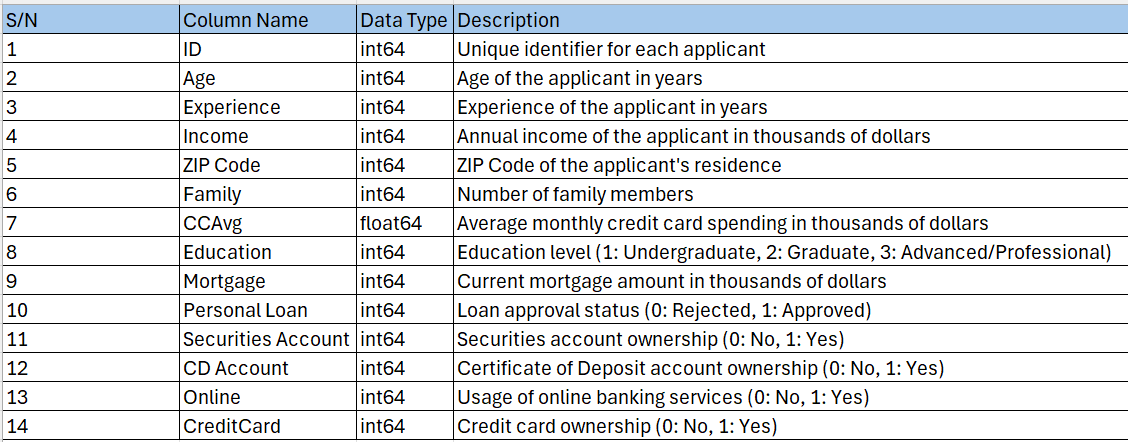

In [2]:
# Import necessary libraries
from IPython.display import Image, display

# Path to the image file
image_path = r"C:\Users\DELL\OneDrive - Northeastern University\Documents\School\ALY 6020\bank_dataset_dict.png" 

# Display the image
display(Image(filename=image_path))

## Know Your Data
### Let's first load the data and inspect it for a preliminary understanding:

In [3]:
file_path = "C:\\Users\\DELL\\Downloads\\Bank_Personal_Loan_Modelling.xlsx"
bank_df = pd.read_excel(file_path, sheet_name=1)

bank_df 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


### Initial Observations:
### The dataset contains 5000 rows and 14 columns, including customer demographics, loan behavior, and personal status

In [4]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
bank_df.columns.tolist()

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [6]:
print(bank_df.describe())

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000  

In [7]:
bank_df.shape


(5000, 14)

### Data Cleaning & Preprocessing
#### 1. Handling Missing Values
#### Check for missing values and handle them accordingly:

In [8]:
cleaned_bank_df = (bank_df.columns
              .str.strip()  # Remove leading and trailing spaces
              .str.replace('((?<=[a-z0-9])[A-Z]|(?!^)[A-Z](?=[a-z]))', r'_\1', regex=True)  
              .str.lower()  # Convert to lowercase
              .str.replace('[ _-]+', '_', regex=True) 
              .str.replace('[}{)(><.!?\\\\:;,-]', '', regex=True)  
             )
bank_df.columns = cleaned_bank_df

In [9]:
# checking for missing values
for c in bank_df.columns:
    print('Total Missing values in \'{}\' are {}.'.format(c,bank_df[c].isna().sum()))

Total Missing values in 'id' are 0.
Total Missing values in 'age' are 0.
Total Missing values in 'experience' are 0.
Total Missing values in 'income' are 0.
Total Missing values in 'zip_code' are 0.
Total Missing values in 'family' are 0.
Total Missing values in 'cc_avg' are 0.
Total Missing values in 'education' are 0.
Total Missing values in 'mortgage' are 0.
Total Missing values in 'personal_loan' are 0.
Total Missing values in 'securities_account' are 0.
Total Missing values in 'cd_account' are 0.
Total Missing values in 'online' are 0.
Total Missing values in 'credit_card' are 0.


In [10]:
# Check for duplicate rows in the DataFrame

duplicate_rows = bank_df[bank_df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [11]:
# Drop the some unnecessary features 

bank_df.drop(['id', 'zip_code'], axis=1, inplace=True)



In [12]:
print(bank_df.columns)

Index(['age', 'experience', 'income', 'family', 'cc_avg', 'education',
       'mortgage', 'personal_loan', 'securities_account', 'cd_account',
       'online', 'credit_card'],
      dtype='object')


In [13]:
bank_df.head()

,age,experience,income,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online,credit_card
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## Outliers Detection

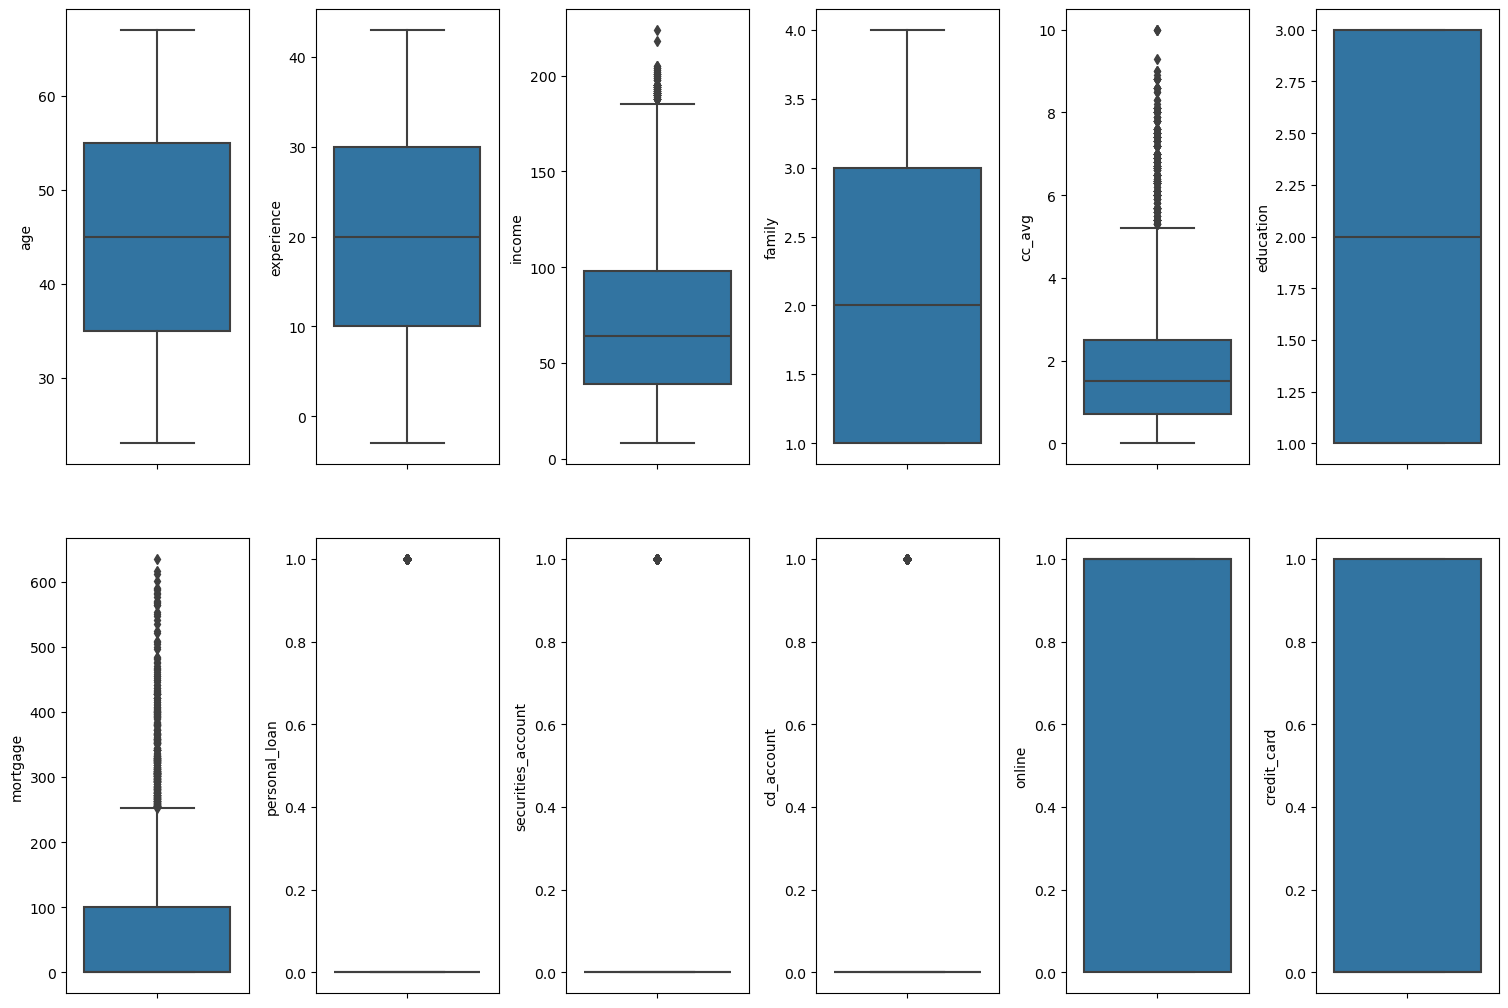

In [14]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()

for k, v in bank_df.items():
    sns.boxplot(y=k, data=bank_df, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [15]:
# Calculate and display outlier percentage for each numeric column

for col in bank_df.select_dtypes(include=np.number).columns:
    q1 = bank_df[col].quantile(0.25)
    q3 = bank_df[col].quantile(0.75)
    irq = q3 - q1
    outliers = bank_df[(bank_df[col] < (q1 - 1.5 * irq)) | (bank_df[col] > (q3 + 1.5 * irq))]
    perc_outliers = (outliers.shape[0] / bank_df.shape[0]) * 100
    print(f"Column {col} has {perc_outliers:.2f}% outliers.")

Column age has 0.00% outliers.
Column experience has 0.00% outliers.
Column income has 1.92% outliers.
Column family has 0.00% outliers.
Column cc_avg has 6.48% outliers.
Column education has 0.00% outliers.
Column mortgage has 5.82% outliers.
Column personal_loan has 9.60% outliers.
Column securities_account has 10.44% outliers.
Column cd_account has 6.04% outliers.
Column online has 0.00% outliers.
Column credit_card has 0.00% outliers.


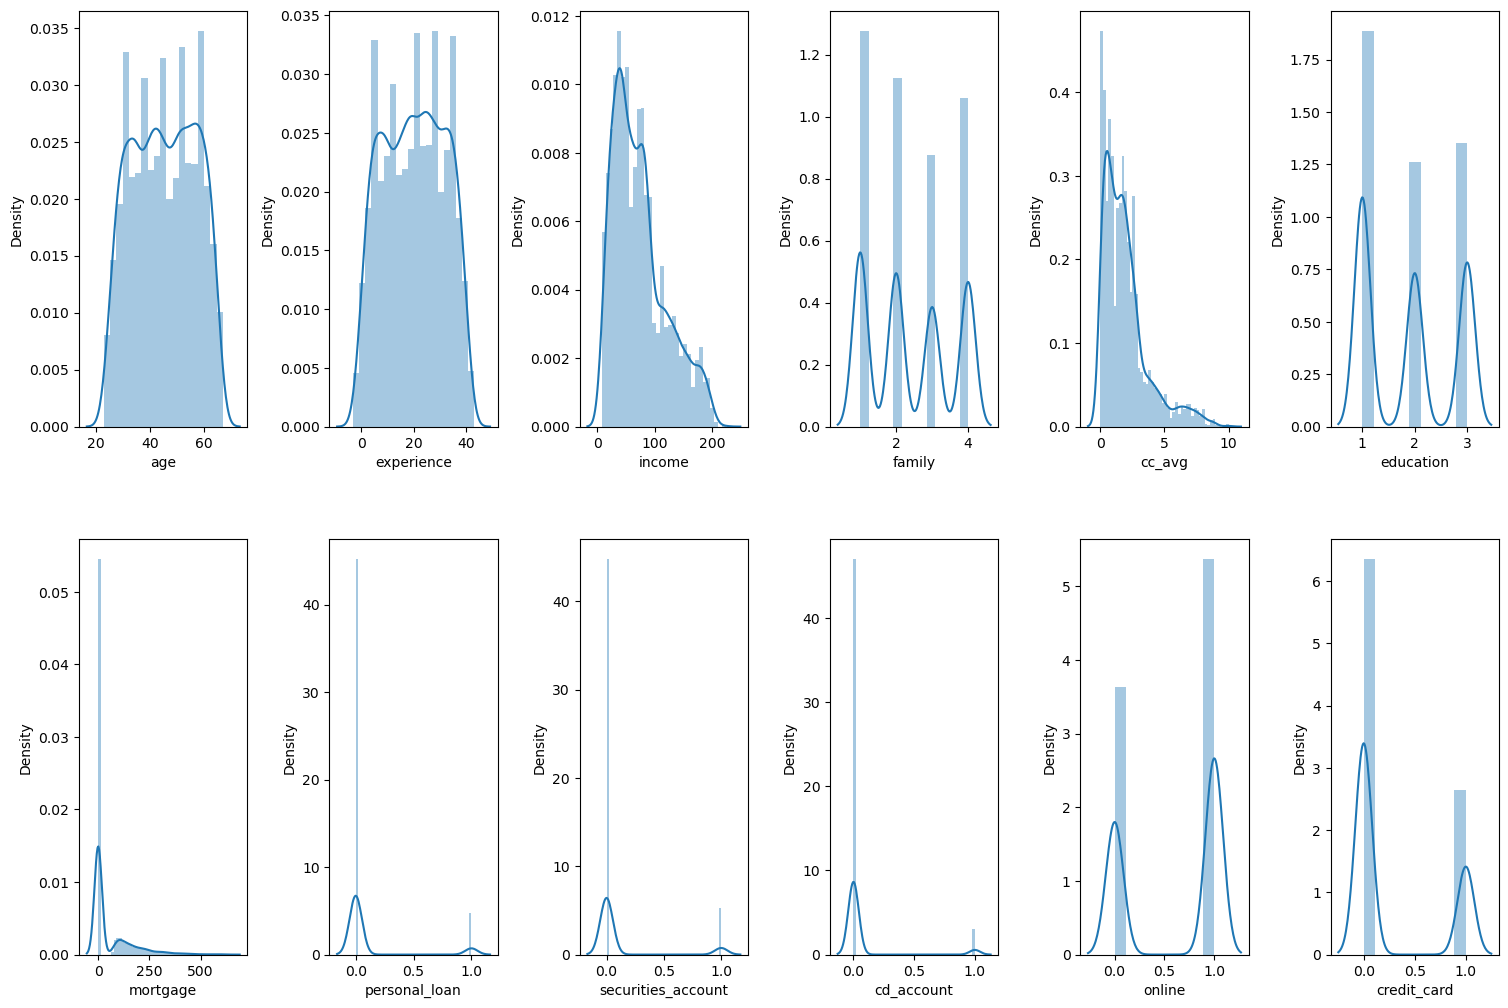

In [16]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()

for k,v in bank_df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Check for the multicollinearity

In [17]:
# compute the vif for all given features
def compute_vif(considered_features):

    X = bank_df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# List of considered features 

considered_features = ['age', 'experience', 'income', 'family', 'cc_avg', 'education',
       'mortgage', 'securities_account', 'cd_account',
       'online', 'credit_card']

compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,age,93.675196
1,experience,93.576891
2,income,1.859002
4,cc_avg,1.728966
8,cd_account,1.329843
7,securities_account,1.137176
5,education,1.114846
10,credit_card,1.107884
6,mortgage,1.051253
9,online,1.039585


In [18]:
# compute vif values after removing a feature
considered_features.remove('experience')
compute_vif(considered_features)

# Now all VIFs are less than 5

,Variable,VIF
0,age,1.008375
1,income,1.854735
2,family,1.032291
3,cc_avg,1.723942
4,education,1.044019
5,mortgage,1.051253
6,securities_account,1.136822
7,cd_account,1.328769
8,online,1.039525
9,credit_card,1.107883


### Feature Engineering

In [19]:
y = bank_df['personal_loan']
x = bank_df[considered_features]

#standardize the scale
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

x.head()

,age,income,family,cc_avg,education,mortgage,securities_account,cd_account,online,credit_card
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


### Train the model and validation

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

,age,income,family,cc_avg,education,mortgage,securities_account,cd_account,online,credit_card
2386,0.181818,0.296296,0.666667,0.16,0.0,0.000000,0.0,0.0,1.0,0.0
1016,0.159091,0.282407,0.000000,0.08,0.5,0.000000,1.0,0.0,1.0,0.0
3824,0.000000,0.018519,1.000000,0.10,0.0,0.000000,1.0,0.0,0.0,1.0
1272,0.931818,0.347222,0.666667,0.18,0.5,0.000000,0.0,0.0,1.0,0.0
2394,0.431818,0.634259,0.333333,0.80,0.0,0.795276,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1820,0.545455,0.078704,0.000000,0.01,0.0,0.233071,0.0,0.0,1.0,0.0
580,0.659091,0.064815,1.000000,0.04,1.0,0.000000,0.0,0.0,1.0,1.0
1757,0.227273,0.240741,0.000000,0.12,0.0,0.000000,0.0,0.0,1.0,1.0
3301,0.568182,0.236111,1.000000,0.26,0.0,0.000000,0.0,0.0,1.0,1.0


## <p style="text-align:center;"> <span style="color:purple">**Logistic Regression**</span></p>


In [21]:
start_time = time.time()
logReg = LogisticRegression(solver = 'liblinear', random_state = 0).fit(x_train, y_train)

logReg.score(x_train, y_train)
logReg_process_time = time.time() - start_time

In [22]:
logReg.score(x_train, y_train)
logReg.score(x_test, y_test) 

0.945

In [23]:
y_pred = logReg.predict(x_test)
# Calculate evaluation metrics
lm_accuracy_train = logReg.score(x_train, y_train)
lm_accuracy_test = accuracy_score(y_test, y_pred)
lm_precision = precision_score(y_test, y_pred)  #### also check for over fitting and under fitting
lm_recall = recall_score(y_test, y_pred)
lm_f1 = f1_score(y_test, y_pred)

print(lm_accuracy_train, lm_accuracy_test,lm_precision)

0.94875 0.945 0.8636363636363636


In [24]:
y_pred = logReg.predict(x_test)
logReg.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [25]:
# Confusion matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[888,   9],
       [ 46,  57]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

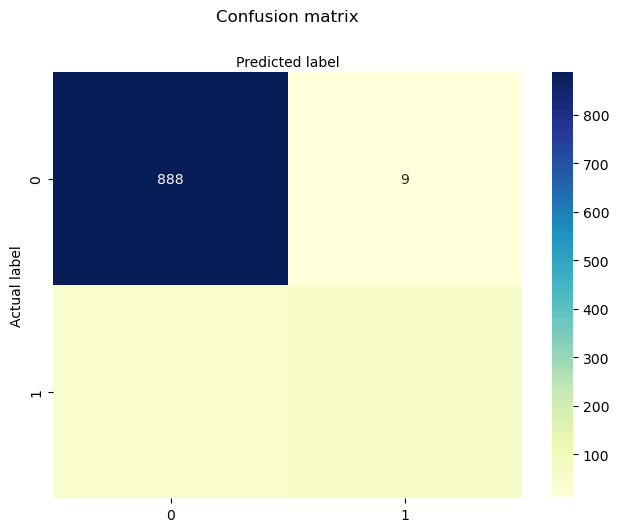

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


### <span style="color:green">**Feature Selection**</span>


In [27]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'f1',  
          cv = 0)

sfs.fit(x_train, y_train)
sfs.k_feature_names_     


('age', 'income', 'education', 'mortgage', 'cd_account')

In [28]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'precision',  
          cv = 0)

sfs.fit(x_train, y_train)
sfs.k_feature_names_     

('income', 'family', 'education', 'cd_account', 'credit_card')

In [29]:
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'recall',  
          cv = 0)

sfs.fit(x_train, y_train)
sfs.k_feature_names_     

('income', 'cc_avg', 'education', 'cd_account', 'credit_card')

In [30]:
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe = rfe.fit(x, y)
# rfe.ranking_
rfe.get_feature_names_out()

array(['income', 'family', 'cc_avg', 'education', 'cd_account'],
      dtype=object)

## <p style="text-align:center;"> <span style="color:green">**Supported Vector Machine (SVM)**</span></p>


In [31]:
# Start counting the time
start_time = time.time()
svm_model = svm.SVC(kernel = 'linear').fit(x_train, y_train)
svm_process_time = time.time() - start_time

In [32]:
y_pred = svm_model.predict(x_test)
# Calculate evaluation metrics
svm_accuracy_train = svm_model.score(x_train, y_train)
svm_accuracy_test = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(svm_accuracy_train, svm_accuracy_test)

0.95325 0.952


### <span style="color:blue">**GridSearch**</span>


In [33]:
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
num_folds = 10
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = svm.SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975000 using {'C': 2.0, 'kernel': 'rbf'}
0.948750 (0.008606) with: {'C': 0.1, 'kernel': 'linear'}
0.954750 (0.010808) with: {'C': 0.1, 'kernel': 'poly'}
0.941500 (0.012460) with: {'C': 0.1, 'kernel': 'rbf'}
0.892000 (0.011662) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.949250 (0.007587) with: {'C': 0.3, 'kernel': 'linear'}
0.962500 (0.008515) with: {'C': 0.3, 'kernel': 'poly'}
0.963750 (0.008892) with: {'C': 0.3, 'kernel': 'rbf'}
0.881750 (0.012896) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.949250 (0.007587) with: {'C': 0.5, 'kernel': 'linear'}
0.968250 (0.007504) with: {'C': 0.5, 'kernel': 'poly'}
0.968750 (0.006915) with: {'C': 0.5, 'kernel': 'rbf'}
0.880000 (0.010897) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.949250 (0.007669) with: {'C': 0.7, 'kernel': 'linear'}
0.969750 (0.006933) with: {'C': 0.7, 'kernel': 'poly'}
0.971500 (0.007089) with: {'C': 0.7, 'kernel': 'rbf'}
0.878500 (0.011358) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.949250 (0.007669) with: {'C': 0.9, 'kernel': 'linear'

In [33]:
#Sequential backward selection(sbs)
sbs = SFS(svm.SVC(kernel = 'linear'),
         k_features=5,
         forward=True,
         floating=False,
         scoring = 'recall',
         cv=0)
         
sbs.fit(x, y)
sbs.k_feature_names_

('age', 'income', 'education', 'securities_account', 'cd_account')

In [34]:
# Sequential backward selection(sbs)
sbs = SFS(svm.SVC(kernel = 'linear'),
         k_features=5,
         forward=True,
         floating=False,
         scoring = 'f1',
         cv=0)
         
sbs.fit(x, y)
sbs.k_feature_names_

('age', 'income', 'education', 'cd_account', 'online')

In [36]:
# Sequential backward selection(sbs)
sbs = SFS(svm.SVC(kernel = 'linear'),
         k_features=5,
         forward=True,
         floating=False,
         scoring = 'precision',
         cv=0)
         
sbs.fit(x, y)
sbs.k_feature_names_

('age', 'income', 'education', 'cd_account', 'online')

In [37]:
rfe = RFE(svm.SVC(kernel = 'linear'), n_features_to_select=5)
rfe = rfe.fit(x, y)
# rfe.ranking_
rfe.get_feature_names_out()

array(['income', 'family', 'education', 'cd_account', 'credit_card'],
      dtype=object)

### <span style="color:green">**Decision Tree**</span>


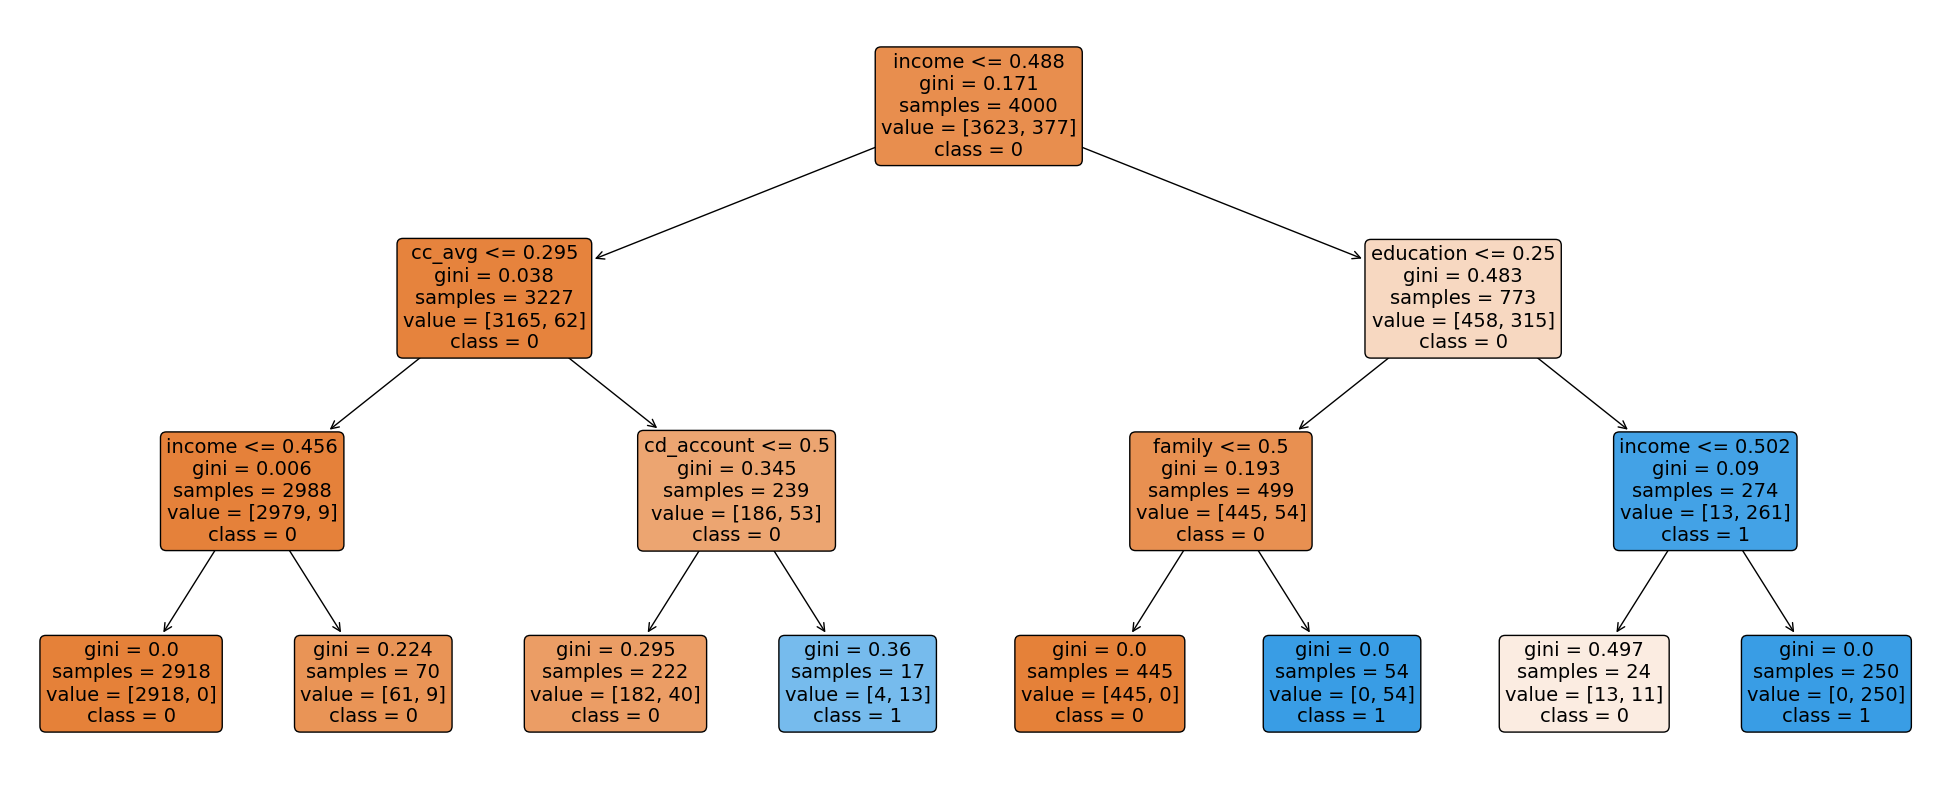

In [36]:
# Decision Tree
tm = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
plt.figure(figsize = (25,10))
plot = tree.plot_tree(tm, feature_names = x.columns.values.tolist(), class_names = ['0', '1'], filled = True, rounded = True, fontsize = 14)
y_pred_tm = tm.predict(x_test)
accuracy_tm = metrics.accuracy_score(y_test, y_pred_tm)

In [37]:
accuracy_tm

0.981

In [38]:
# Train and predict using Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Calculate evaluation metrics for Decision Tree
dt_accuracy_train = dt_model.score(x_train, y_train)
dt_accuracy_test = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print(dt_accuracy_train, dt_accuracy_test)


1.0 0.986


In [39]:

# Measure processing time for Decision Tree
start_time = time.time()
dt_model.fit(x_train, y_train)
dt_process_time = time.time() - start_time

# Print processing time
print("Decision Tree Processing Time:", dt_process_time)


Decision Tree Processing Time: 0.01910853385925293


### <span style="color:green">**Random Forest**</span>


In [40]:
rfclass = RandomForestClassifier(n_estimators = 20, random_state = 0).fit(x_train, y_train)
p_pred_rf = rfclass.predict(x_test)
accuracy_rf = accuracy_score(y_test, p_pred_rf)
rfclass.score(x_test, y_test)

0.989

In [41]:
# Train and predict using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Calculate evaluation metrics for Random Forest
rf_accuracy_train = rf_model.score(x_train, y_train)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(rf_accuracy_train, rf_accuracy_test)


1.0 0.99


In [42]:
# Measure processing time for Random Forest
start_time = time.time()
rf_model.fit(x_train, y_train)
rf_process_time = time.time() - start_time

# Print processing time
print("Random Forest Processing Time:", rf_process_time)


Random Forest Processing Time: 0.6960875988006592


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

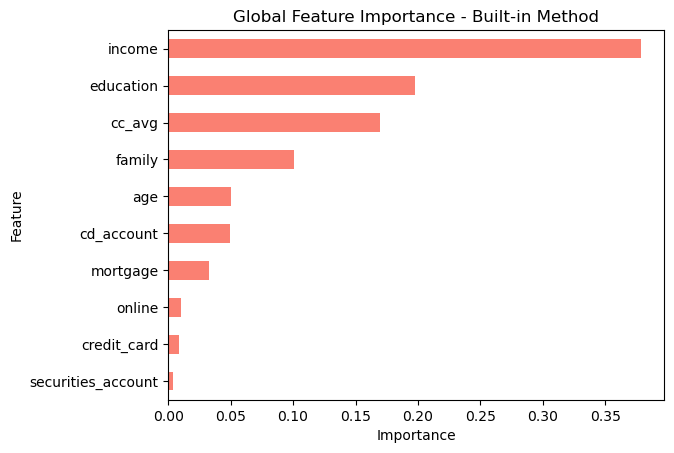

In [43]:
global_importances = pd.Series(rfclass.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='salmon')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [44]:
from sklearn.inspection import permutation_importance


result = permutation_importance(rfclass, x_test, y_test, n_repeats=10, random_state=42)

perm_importances = result.importances_mean
perm_std = result.importances_std
sorted_idx = perm_importances.argsort()
feature_names = x_test.columns

pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=False)

,Importance,Std
securities_account,0.1785,0.008617
age,0.0869,0.008561
online,0.0628,0.004142
credit_card,0.0197,0.003002
family,0.0073,0.001616
mortgage,0.0012,0.001166
income,0.0011,0.001221
education,0.0003,0.000900
cc_avg,0.0001,0.000300
cd_account,-0.0006,0.000490


### <span style="color:green">**Gradient Boostng Classifier**</span>


In [45]:
gbclass = GradientBoostingClassifier(random_state = 0).fit(x_train, y_train)
p_pred_gb = gbclass.predict(x_test)
accuracy_gb = accuracy_score(y_test, p_pred_gb)
gbclass.score(x_test, y_test)

0.99

In [46]:
# Train and predict using Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)

# Calculate evaluation metrics for Gradient Boosting
gb_accuracy_train = gb_model.score(x_train, y_train)
gb_accuracy_test = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

print(gb_accuracy_train, gb_accuracy_test)


0.99375 0.99


In [47]:
# Measure processing time for Gradient Boosting
start_time = time.time()
gb_model.fit(x_train, y_train)
gb_process_time = time.time() - start_time

# Print processing time
print("Gradient Boosting Processing Time:", gb_process_time)


Gradient Boosting Processing Time: 0.8628025054931641


In [48]:
# Define scoring metric and number of features
scoring_metric = 'precision'  
k_features = 5  # Desired number of features

# SFS for Decision Tree
sfs_dt = SFS(dt_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_dt.fit(x, y)
print("Decision Tree - Selected Features:", sfs_dt.k_feature_names_)

# SFS for Random Forest
sfs_rf = SFS(rf_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_rf.fit(x, y)
print("Random Forest - Selected Features:", sfs_rf.k_feature_names_)

# SFS for Gradient Boosting
sfs_gb = SFS(gb_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_gb.fit(x, y)
print("Gradient Boosting - Selected Features:", sfs_gb.k_feature_names_)

Decision Tree - Selected Features: ('family', 'cc_avg', 'education', 'securities_account', 'online')
Random Forest - Selected Features: ('age', 'family', 'cc_avg', 'education', 'securities_account')
Gradient Boosting - Selected Features: ('family', 'cc_avg', 'securities_account', 'online', 'credit_card')


In [49]:
# Define scoring metric and number of features
scoring_metric = 'f1' 
k_features = 5  # Desired number of features

# SFS for Decision Tree
sfs_dt = SFS(dt_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_dt.fit(x, y)
print("Decision Tree - Selected Features:", sfs_dt.k_feature_names_)

# SFS for Random Forest
sfs_rf = SFS(rf_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_rf.fit(x, y)
print("Random Forest - Selected Features:", sfs_rf.k_feature_names_)

# SFS for Gradient Boosting
sfs_gb = SFS(gb_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_gb.fit(x, y)
print("Gradient Boosting - Selected Features:", sfs_gb.k_feature_names_)

Decision Tree - Selected Features: ('income', 'family', 'cc_avg', 'education', 'cd_account')
Random Forest - Selected Features: ('age', 'income', 'family', 'cc_avg', 'education')
Gradient Boosting - Selected Features: ('income', 'family', 'cc_avg', 'education', 'securities_account')


In [50]:
# Define scoring metric and number of features
scoring_metric = 'recall'  # Replace with 'recall' or 'f1' as needed
k_features = 5  # Desired number of features

# SFS for Decision Tree
sfs_dt = SFS(dt_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_dt.fit(x, y)
print("Decision Tree - Selected Features:", sfs_dt.k_feature_names_)

# SFS for Random Forest
sfs_rf = SFS(rf_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_rf.fit(x, y)
print("Random Forest - Selected Features:", sfs_rf.k_feature_names_)

# SFS for Gradient Boosting
sfs_gb = SFS(gb_model, k_features=k_features, forward=True, floating=False, scoring=scoring_metric, cv=5)
sfs_gb.fit(x, y)
print("Gradient Boosting - Selected Features:", sfs_gb.k_feature_names_)

Decision Tree - Selected Features: ('age', 'income', 'family', 'cc_avg', 'education')
Random Forest - Selected Features: ('income', 'family', 'cc_avg', 'education', 'cd_account')
Gradient Boosting - Selected Features: ('income', 'family', 'cc_avg', 'education', 'cd_account')


In [51]:
# RFE for Decision Tree
rfe_dt = RFE(estimator=dt_model, n_features_to_select=k_features)
rfe_dt.fit(x, y)
print("Decision Tree - Selected Features:", x.columns[rfe_dt.support_])


# RFE for Gradient Boosting
rfe_gb = RFE(estimator=gb_model, n_features_to_select=k_features)
rfe_gb.fit(x, y)
print("Gradient Boosting - Selected Features:", x.columns[rfe_gb.support_])


Decision Tree - Selected Features: Index(['age', 'income', 'family', 'cc_avg', 'education'], dtype='object')
Gradient Boosting - Selected Features: Index(['income', 'family', 'cc_avg', 'education', 'cd_account'], dtype='object')


### <span style="color:green">**Stakeholders Questions**</span>


### Q1
#### What were the three most significant Variables?

### From the feature importance analyses,the three most significant variables across models were:

#### Income
#### Education
#### CCAvg (Average credit card spending)
#### These features consistently appeared as the top predictors for loan approval decisions across different models (Random Forest and Gradient Boosting), indicating their strong influence on the model's predictions.

### Q2
#### Of those three, which had the most negative influence on loan acceptance?


#### To determine negative influence, we would consider a feature that, when increased, decreases the likelihood of loan approval. In the context of these features:

#### CCAvg (Average credit card spending) is likely to have the most negative influence on loan acceptance. Higher credit card spending could indicate potential risk, leading the model to more likely reject applicants with higher values in this feature.
#### While Income and Education positively correlate with loan acceptance, higher average credit card spending might reduce approval chances due to perceived risk.

### Q3
#### What is the best KPI (recall, precision, F1-score, etc) to measure the performance of your models?



#### Given that our goal is to decide on loan approvals accurately, Precision is the best KPI to focus on. This metric minimizes false positives (i.e., incorrectly approving loans for ineligible applicants), which is crucial for avoiding financial risks associated with defaults. Precision ensures that when the model predicts a loan approval, it is likely to be correct.

### Q4
#### Summarize all the KPIs for each model in a table including the processing time for running the models.


In [52]:
evaluation_metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy_train': [lm_accuracy_train, svm_accuracy_train, dt_accuracy_train, rf_accuracy_train, gb_accuracy_train],
    'Accuracy_test': [lm_accuracy_test, svm_accuracy_test, dt_accuracy_test, rf_accuracy_test, gb_accuracy_test],
    'Precision': [lm_precision, svm_precision, dt_precision, rf_precision, gb_precision],
    'Recall': [lm_recall, svm_recall, dt_recall, rf_recall, gb_recall],
    'f1': [lm_f1, svm_f1, dt_f1, rf_f1, gb_f1],
       'Processing Time (sec)': [logReg_process_time, svm_process_time, dt_process_time, rf_process_time, gb_process_time]
}

metrics_df = pd.DataFrame(evaluation_metrics)
metrics_df


,Model,Accuracy_train,Accuracy_test,Precision,Recall,f1,Processing Time (sec)
0,Logistic Regression,0.94875,0.945,0.863636,0.553398,0.674556,0.045048
1,SVM,0.95325,0.952,0.887324,0.611650,0.724138,0.268328
2,Decision Tree,1.00000,0.986,0.958763,0.902913,0.930000,0.019109
3,Random Forest,1.00000,0.990,0.969697,0.932039,0.950495,0.696088
4,Gradient Boosting,0.99375,0.990,0.960396,0.941748,0.950980,0.862803


### Q5
#### Of those models, which one has the best performance according to your answer in Q3 and the processing time?

#### According to the priority on Precision and reasonable Processing Time, Gradient Boosting is the best performer:
#### •	Precision: Gradient Boosting has the highest precision (93.27%), which aligns with your goal to minimize false positives in loan approvals.
#### •	Processing Time: Gradient Boosting has a moderate processing time of approximately 0.48 seconds, making it efficient enough for practical use without compromising on accuracy.
#### While Random Forest also has a high F1-score and balanced metrics, Gradient Boosting’s superior precision makes it better suited to avoid incorrect approvals, which is the primary objective. Therefore, Gradient Boosting offers the best performance in terms of precision and overall reliability in loan approval predictions, while maintaining an acceptable processing time.
